<a href="https://colab.research.google.com/github/SonalM25/PythonML/blob/main/project_customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**: You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective ways to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

**Features**: ● age (numeric) ● job : type of job ● marital : marital status ● educational_qual : education status ● call_type : contact communication type ● day: last contact day of the month (numeric) ● mon: last contact month of year ● dur: last contact duration, in seconds (numeric) ● num_calls: number of contacts performed during this campaign and for this client ● prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") Output variable (desired target): ● y - has the client subscribed to the insurance?

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/Customer Conversion Prediction.csv')

In [7]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [8]:
df.shape


(45211, 11)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [10]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [12]:
df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [13]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [14]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [15]:
df["education_qual"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [16]:
df["call_type"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
df["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [18]:
df["mon"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [19]:
df["dur"].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [20]:
df["num_calls"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [21]:
df["prev_outcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


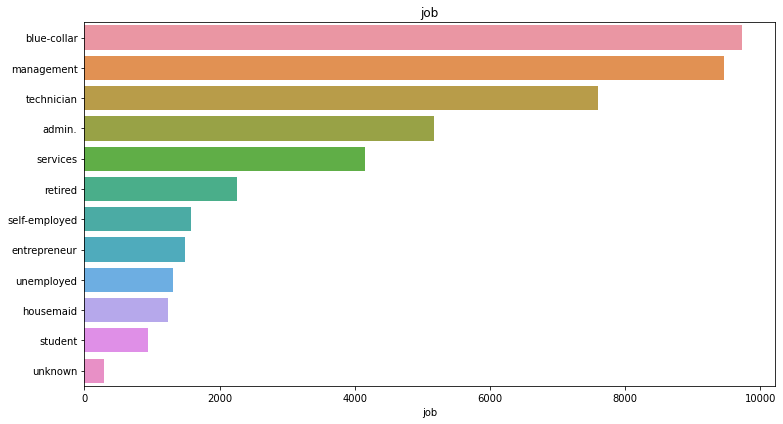

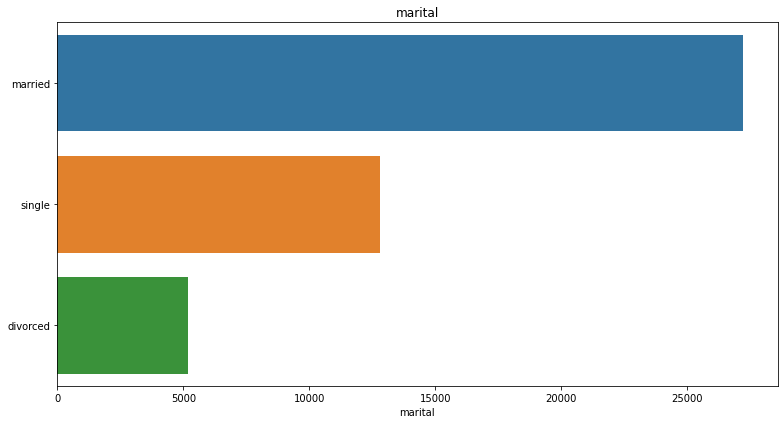

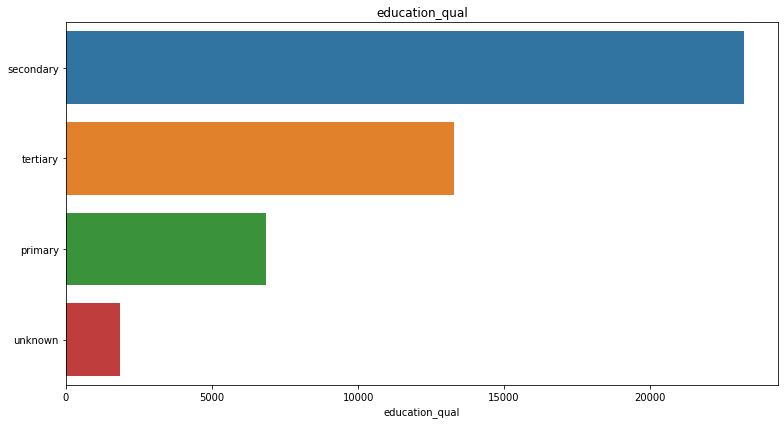

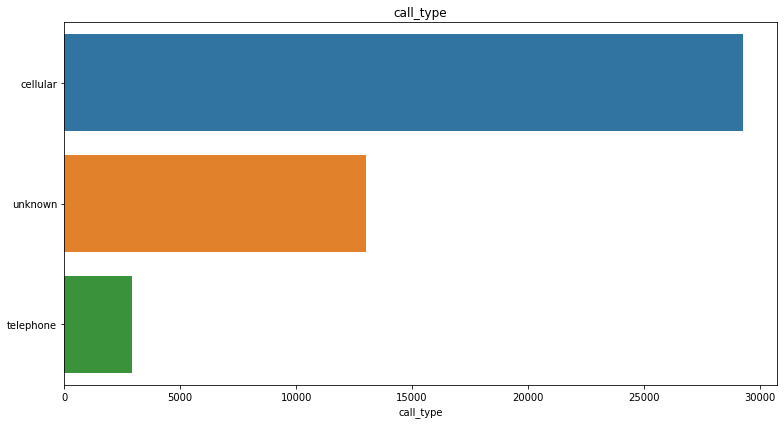

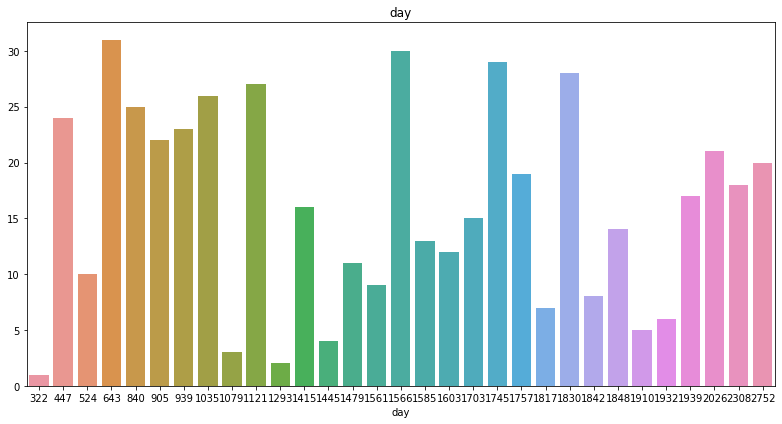

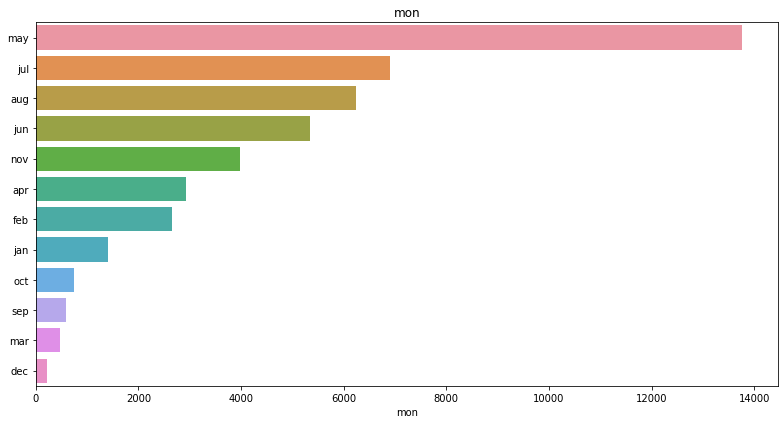

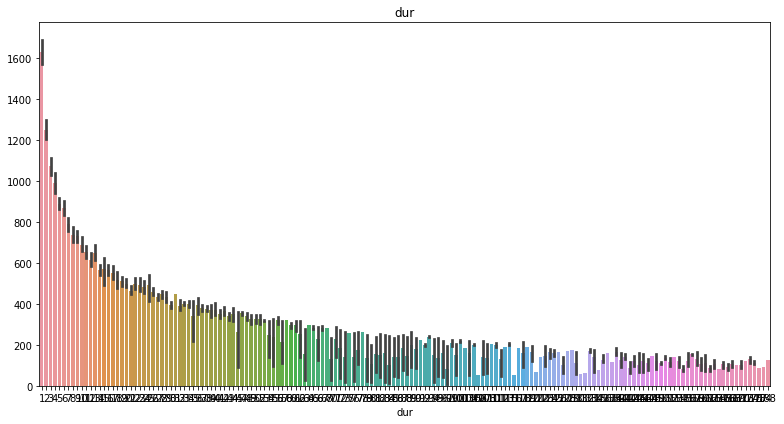

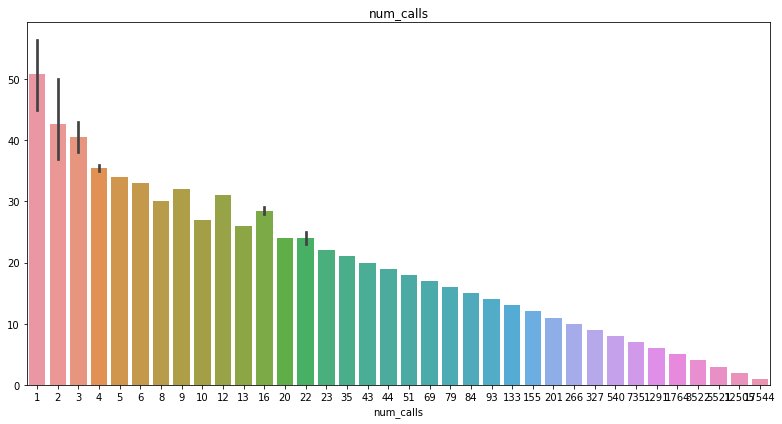

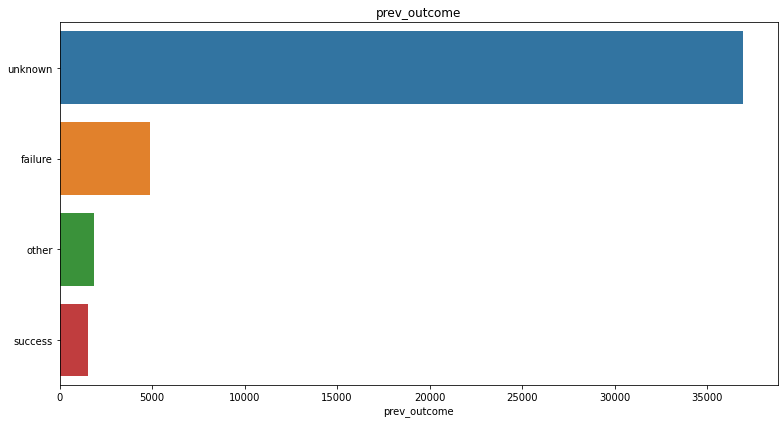

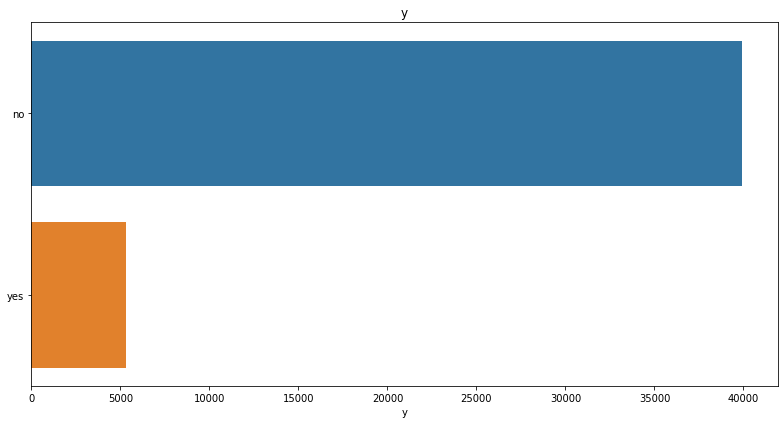

In [23]:
categori=['job', 'marital', 'education_qual', 'call_type','day', 'mon', 'dur', 'num_calls', 'prev_outcome','y']
for col in categori:
    plt.figure(figsize=(11,6))
    sns.barplot(x=df[col].value_counts(),y=df[col].value_counts().index,data=df)
    plt.title(col)
    plt.tight_layout()

**Input Categorical feature Observation**
 1.Job - More Job types are blue-collar,management and technician and it means bank targeting high salaried people. 2)Marital - more people of type married

Education - more count in university.degree people . of course High salaried people should have university degree expected. And illiterate count is very less.

default - most people have no credit default ,which means they can be approched .

housing - we must give more importance to people who have not taken any housing loan.

6)loan - we must give more importance to people who have not taken any personnel loan.

month - Seems May is busy season in Portuguese

Day_of_week - Seems every day is busy but not on weekends.

p_outcome -outcome of the previous marketing campaign- Success is small rate. 

**Categorize variables correlated with Target Variables**

In [24]:
features = ['age','job','marital','prev_outcome']


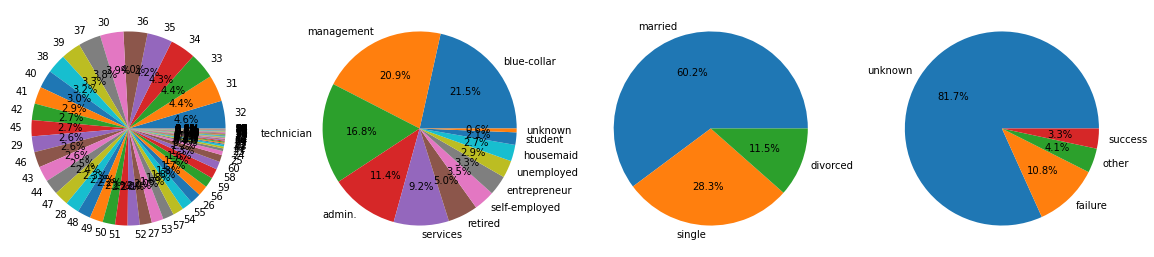

In [25]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
   plt.subplot(1, 4, i + 1)
   x = df[col].value_counts()
   plt.pie(x.values,
labels=x.index,
autopct='%1.1f%%')
plt.show()

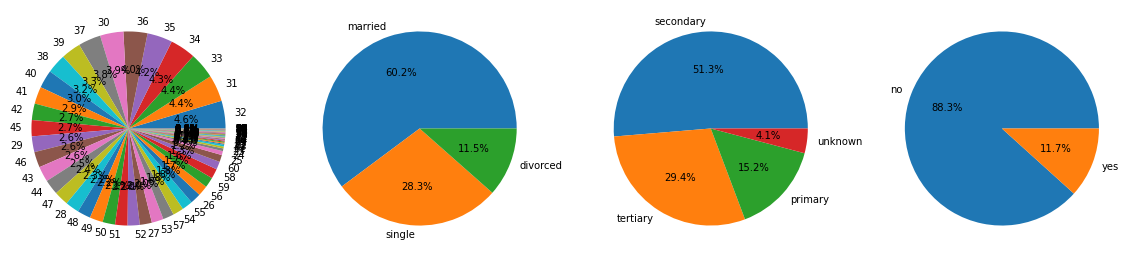

In [26]:
features = ['age','marital','education_qual','y']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
   plt.subplot(1, 4, i + 1)
   x = df[col].value_counts()
   plt.pie(x.values,
labels=x.index,
autopct='%1.1f%%')
plt.show()

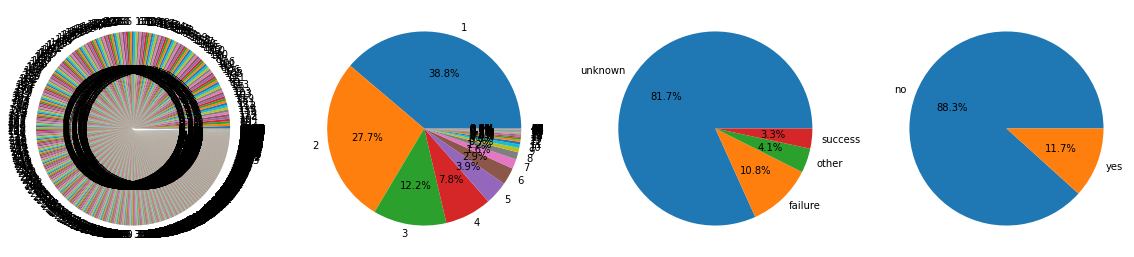

In [27]:
features = ['dur','num_calls','prev_outcome','y']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
   plt.subplot(1, 4, i + 1)
   x = df[col].value_counts()
   plt.pie(x.values,
labels=x.index,
autopct='%1.1f%%')
plt.show()

In [28]:
from scipy import stats

In [29]:
df.groupby(['age','y']).y.count()

age  y  
18   no      5
     yes     7
19   no     24
     yes    11
20   no     35
            ..
92   yes     2
93   yes     2
94   no      1
95   no      1
     yes     1
Name: y, Length: 148, dtype: int64

(array([[3.2000e+02, 1.4620e+03, 1.2950e+03, 7.2600e+02, 6.4800e+02,
         4.9700e+02, 1.4800e+02, 1.3800e+02, 4.8000e+01, 7.0000e+00],
        [1.0160e+03, 1.0285e+04, 1.1630e+04, 7.2890e+03, 6.4180e+03,
         2.8150e+03, 2.2900e+02, 1.6500e+02, 6.8000e+01, 7.0000e+00]]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 2 BarContainer objects>)

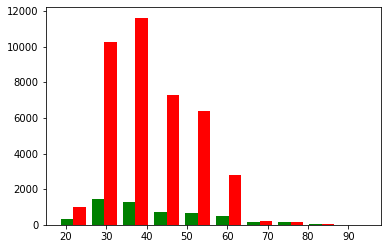

In [30]:
age_churn_no=df[df.y=='no'].age
age_churn_yes=df[df.y=='yes'].age
plt.hist([age_churn_yes,age_churn_no], color=['green','red'])

In [31]:
df.groupby(['job','y']).y.count()

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: y, dtype: int64

(array([[3.2000e+02, 1.4620e+03, 1.2950e+03, 7.2600e+02, 6.4800e+02,
         4.9700e+02, 1.4800e+02, 1.3800e+02, 4.8000e+01, 7.0000e+00],
        [1.0160e+03, 1.0285e+04, 1.1630e+04, 7.2890e+03, 6.4180e+03,
         2.8150e+03, 2.2900e+02, 1.6500e+02, 6.8000e+01, 7.0000e+00]]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 2 BarContainer objects>)

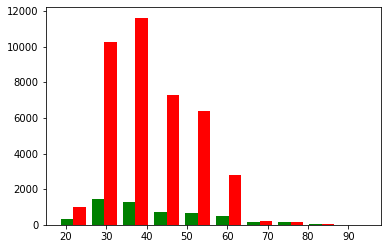

In [32]:
job_churn_no=df[df.y=='no'].job
job_churn_yes=df[df.y=='yes'].job
plt.hist([age_churn_yes,age_churn_no], color=['green','red'])

In [33]:
df.groupby(['marital','y']).y.count()

marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
Name: y, dtype: int64

(array([[ 2755.,     0.,     0.,     0.,     0.,  1912.,     0.,     0.,
             0.,   622.],
        [24459.,     0.,     0.,     0.,     0., 10878.,     0.,     0.,
             0.,  4585.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

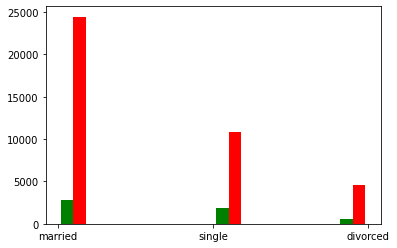

In [34]:
marital_churn_no=df[df.y=='no'].marital
marital_churn_yes=df[df.y=='yes'].marital
plt.hist([marital_churn_yes,marital_churn_no], color=['green','red'])

In [35]:
df.groupby(['education_qual','y']).y.count()

education_qual  y  
primary         no      6260
                yes      591
secondary       no     20752
                yes     2450
tertiary        no     11305
                yes     1996
unknown         no      1605
                yes      252
Name: y, dtype: int64

(array([[ 2450.,     0.,     0.,  1996.,     0.,     0.,   252.,     0.,
             0.,   591.],
        [20752.,     0.,     0., 11305.,     0.,     0.,  1605.,     0.,
             0.,  6260.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 2 BarContainer objects>)

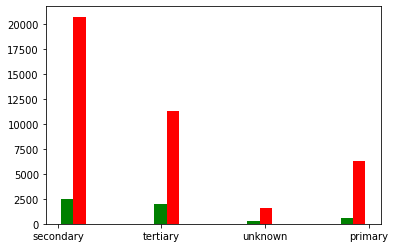

In [36]:
edu_churn_no=df[df.y=='no'].education_qual
edu_churn_yes=df[df.y=='yes'].education_qual
plt.hist([edu_churn_yes,edu_churn_no], color=['green','red'])

In [37]:
df.groupby(['dur','y']).y.count()

dur   y  
0     no      3
1     no      2
2     no      3
3     no      4
4     no     15
             ..
3366  no      1
3422  no      1
3785  no      1
3881  yes     1
4918  no      1
Name: y, Length: 2627, dtype: int64

(array([[2.9750e+03, 1.6490e+03, 5.1700e+02, 1.1200e+02, 2.3000e+01,
         7.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.6702e+04, 2.7760e+03, 3.4800e+02, 6.4000e+01, 2.0000e+01,
         4.0000e+00, 6.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <a list of 2 BarContainer objects>)

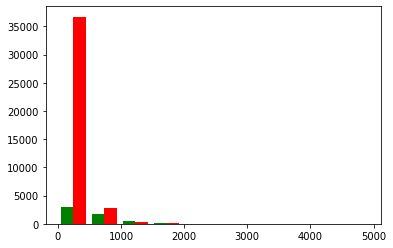

In [38]:
dur_churn_no=df[df.y=='no'].dur
dur_churn_yes=df[df.y=='yes'].dur
plt.hist([dur_churn_yes,dur_churn_no], color=['green','red'])

In [39]:
df.groupby(['num_calls','y']).y.count()

num_calls  y  
1          no     14983
           yes     2561
2          no     11104
           yes     1401
3          no      4903
                  ...  
50         no         2
51         no         1
55         no         1
58         no         1
63         no         1
Name: y, Length: 70, dtype: int64

(array([[5.1750e+03, 9.3000e+01, 1.6000e+01, 3.0000e+00, 1.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.7707e+04, 1.5290e+03, 4.0400e+02, 1.6200e+02, 7.4000e+01,
         3.2000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <a list of 2 BarContainer objects>)

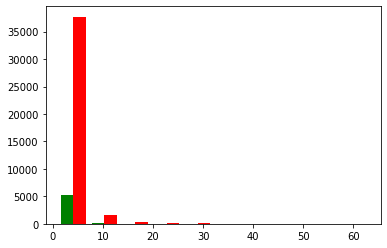

In [40]:
calls_churn_no=df[df.y=='no'].num_calls
calls_churn_yes=df[df.y=='yes'].num_calls
plt.hist([calls_churn_yes,calls_churn_no], color=['green','red'])
     

In [41]:
df.groupby(['prev_outcome','y']).y.count()

prev_outcome  y  
failure       no      4283
              yes      618
other         no      1533
              yes      307
success       no       533
              yes      978
unknown       no     33573
              yes     3386
Name: y, dtype: int64

(array([[ 3386.,     0.,     0.,   307.,     0.,     0.,   618.,     0.,
             0.,   978.],
        [33573.,     0.,     0.,  1533.,     0.,     0.,  4283.,     0.,
             0.,   533.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 2 BarContainer objects>)

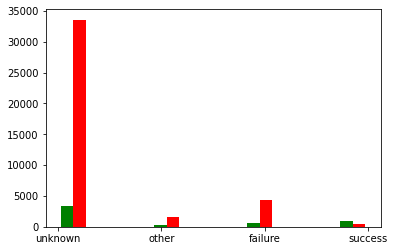

In [42]:
prev_churn_no=df[df.y=='no'].prev_outcome
prev_churn_yes=df[df.y=='yes'].prev_outcome
plt.hist([prev_churn_yes,prev_churn_no], color=['green','red'])

**Inference/Result:**

1)There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.
2)Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

3)Variables with unknown/missing values are : 'education_qual', 'job', 'call_type', 'prev_outcome'.

Therefore, we start with creating new variables for the unknown values in 'education_qual', 'job', 'call_type', 'prev_outcome'. We do this to see if the values are missing at random or is there a pattern in the missing values.

In [43]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [44]:
from sklearn.model_selection import train_test_split


In [45]:
y=df[['y']]

In [46]:
features =df.drop('y', axis=1)
target = df['y']
X = df.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
     

In [47]:
X_test.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

In [48]:
X_train.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

In [49]:
y_train.head()

,y
10747,no
26054,no
9125,no
41659,no
4443,no


In [50]:
y_test.head()

,y
3776,no
9928,no
33409,no
31885,no
15738,no


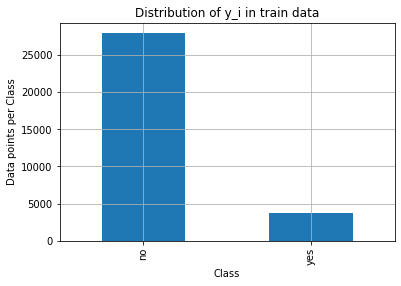

Number of data points in class 1 : 27956 ( 88.337 %)
Number of data points in class 2 : 3691 ( 11.663 %)
--------------------------------------------------------------------------------


In [51]:
def plot_distribution(class_distribution,title,xlabel,ylabel):

   class_distribution.plot(kind='bar')
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   plt.title(title)
   plt.grid()
   plt.show()
# it returns a dict, keys as class labels and values as the number of data points in that class   
train_class_distribution = y_train['y'].value_counts()
test_class_distribution = y_test['y'].value_counts()

plot_distribution(train_class_distribution,
                 'Distribution of y_i in train data',
                 'Class',
                 'Data points per Class')

# -(train_class_distribution.values): the minus sign will give us in decreasing order

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
  print('Number of data points in class', i+1, ':',train_class_distribution.values[i],
        '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')
print('-'*80)

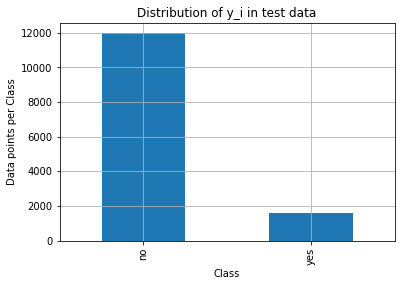

Number of data points in class 1 : 11966 ( 88.219 %)
Number of data points in class 2 : 1598 ( 11.781 %)
--------------------------------------------------------------------------------


In [52]:
plot_distribution(test_class_distribution,
                 'Distribution of y_i in test data',
                 'Class',
                 'Data points per Class')
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
   print('Number of data points in class', i+1, ':',test_class_distribution.values[i],
         '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')
print('-'*80)

In [53]:
data = pd.concat([X_train, y_train], axis=1)

In [54]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
10747,36,technician,single,tertiary,unknown,17,jun,153,4,unknown,no
26054,56,entrepreneur,married,secondary,cellular,19,nov,312,3,unknown,no
9125,46,blue-collar,married,secondary,unknown,5,jun,83,2,unknown,no
41659,41,management,divorced,tertiary,cellular,1,oct,302,1,success,no
4443,38,blue-collar,married,secondary,unknown,20,may,90,1,unknown,no


In [55]:
data_1= pd.concat([X_test, y_test], axis=1)

In [56]:
data_1.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,blue-collar,married,secondary,unknown,16,may,192,1,unknown,no
9928,47,services,single,secondary,unknown,9,jun,83,2,unknown,no
33409,25,student,single,tertiary,cellular,20,apr,226,1,unknown,no
31885,42,management,married,tertiary,cellular,9,apr,311,1,failure,no
15738,56,management,married,tertiary,cellular,21,jul,121,2,unknown,no


In [57]:
df2 = pd.read_csv('/content/Customer Conversion Prediction.csv')

**Imputation:**
 Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [58]:
def cross_tab(df,f1,f2):

# find no of unique values in jobs colums
   job=list(df[f1].unique())
# find no of unique values in education columns
   education_qual=list(df[f2].unique())
   dataframes=[]
   for e in education_qual:
      dfe=df[df[f2]==e]
      dfejob=dfe.groupby(f1).count()[f2]
      dataframes.append(dfejob)

   xx=pd.concat(dataframes,axis=1)
   xx.columns=education_qual
   xx=xx.fillna(0)
   return xx

In [59]:
cross_tab(df2,'job','education_qual')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,366,984,119,795
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


Inferring education from jobs : From the cross-tabulation, it can be seen that people with management jobs usually have a tertiary education. Hence wherever 'job' = management and 'education_qual' = unknown, we can replace 'education_qual' with 'tertiary'. Similarly, 'job' = 'services' --> 'education_qual' = 'secondary' and 'job' = 'housemaid' --> 'education_qual' = 'primary'.

Inferring jobs from education : If 'education_qual' = 'primary' or 'secondary' then the 'job' is usually 'blue-collar'. If 'education_qual' = 'tertiary', then the 'job' = 'management'.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [60]:
df['job'][df['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [61]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education_qual']=='unknown') & (df['job']=='management'),'education_qual'] = 'tertiary'
df.loc[(df['education_qual']=='unknown') & (df['job']=='services'),'education_qual'] = 'secondary'
df.loc[(df['education_qual']=='unknown') & (df['job']=='housemaid'),'education_qual'] = 'primary'
df.loc[(df['job'] == 'unknown') & (df['education_qual']=='primary'), 'job'] ='blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education_qual']=='secondary'), 'job'] ='blue-collar'
df.loc[(df['job']=='unknown') & (df['education_qual']=='tertiary'),'job'] = 'management'

In [62]:
cross_tab(df,'job','education_qual')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572.0,4219.0,171.0,209.0
blue-collar,149.0,5437.0,454.0,3808.0
entrepreneur,686.0,542.0,76.0,183.0
housemaid,173.0,395.0,0.0,672.0
management,8077.0,1121.0,0.0,294.0
retired,371.0,989.0,130.0,796.0
self-employed,833.0,577.0,39.0,130.0
services,202.0,3607.0,0.0,345.0
student,223.0,508.0,163.0,44.0


As we can see, we are able to reduce the number of unknowns and enhance our data set.

**Outlier check**

<Axes: >

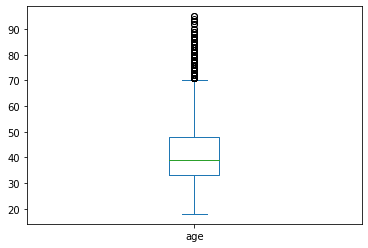

In [63]:
df.age.plot(kind='box')

In [64]:
print(df.age.max())
df[df['age'] > 80].head()
     

95


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
29158,83,retired,married,primary,telephone,2,feb,912,1,unknown,no
29322,83,retired,married,tertiary,cellular,2,feb,283,2,unknown,no
31051,83,retired,single,primary,telephone,12,feb,89,1,unknown,no
31055,85,retired,married,primary,telephone,12,feb,165,2,unknown,yes
31069,90,retired,divorced,secondary,cellular,13,feb,152,3,unknown,yes


<Axes: ylabel='Frequency'>

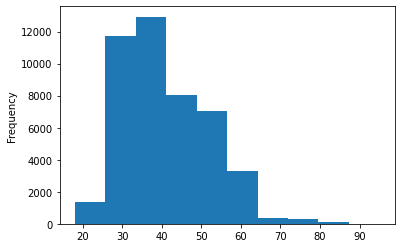

In [65]:
df.age.plot(kind='hist')

<Axes: ylabel='Density'>

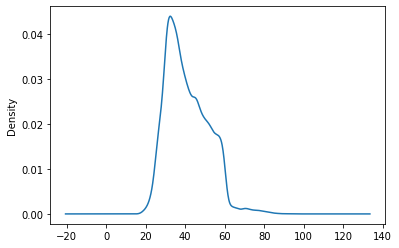

In [66]:
df.age.plot(kind='kde')

In [67]:
def binning(dataframe,featureName):

   print (featureName)
   q1 = dataframe[featureName].quantile(0.25)
   q2 = dataframe[featureName].quantile(0.50)
   q3 = dataframe[featureName].quantile(0.75)
   dataframe.loc[(dataframe[featureName] <= q1), featureName] = 1
   dataframe.loc[(dataframe[featureName] > q1) & (dataframe[featureName] <=q2), featureName] = 2
   dataframe.loc[(dataframe[featureName] > q2) & (dataframe[featureName] <=q3), featureName] = 3
   dataframe.loc[(dataframe[featureName] > q3), featureName] = 4
   print (q1, q2, q3)

In [68]:
binning(df,'age')

age
33.0 39.0 48.0


In [69]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [70]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,4,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,3,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,1,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,3,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,1,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**One Hot Encoding**

In [71]:
df['prev_outcome'] = df['prev_outcome'].map({'failure': -1,'unknown':0,'success': 1,'others':0})
df['call_type'] = df['call_type'].map({'cellular': -1,'unknown': 0,'telephone':1})

In [72]:
nominal = ['job','marital','education_qual','day','mon','dur','num_calls']
data_clean = pd.get_dummies(df,columns=nominal)
data_clean['y']=data_clean['y'].map({'yes': 1,'no': 0})
data_clean.head()
     

,age,call_type,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,num_calls_39,num_calls_41,num_calls_43,num_calls_44,num_calls_46,num_calls_50,num_calls_51,num_calls_55,num_calls_58,num_calls_63
0,4,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data_clean.columns

Index(['age', 'call_type', 'prev_outcome', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired',
       ...
       'num_calls_39', 'num_calls_41', 'num_calls_43', 'num_calls_44',
       'num_calls_46', 'num_calls_50', 'num_calls_51', 'num_calls_55',
       'num_calls_58', 'num_calls_63'],
      dtype='object', length=1687)

In [74]:
data_clean.describe()

,age,call_type,prev_outcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,num_calls_39,num_calls_41,num_calls_43,num_calls_44,num_calls_46,num_calls_50,num_calls_51,num_calls_55,num_calls_58,num_calls_63
count,45211.000000,45211.000000,43371.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,2.441353,-0.583464,-0.078163,0.116985,0.114375,0.217823,0.032890,0.027427,0.209949,0.050563,...,0.000022,0.000044,0.000066,0.000022,0.000022,0.000044,0.000022,0.000022,0.000022,0.000022
std,1.149028,0.609586,0.376477,0.321406,0.318269,0.412771,0.178351,0.163326,0.407276,0.219106,...,0.004703,0.006651,0.008146,0.004703,0.004703,0.006651,0.004703,0.004703,0.004703,0.004703
min,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**HEAT MAP**

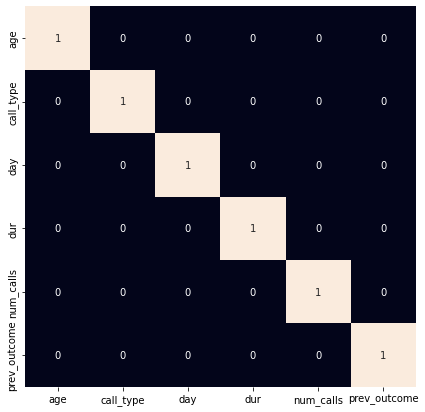

In [75]:
plt.figure(figsize=(7, 7))
sb.heatmap(df.corr() > 0.8,
          annot=True,
          cbar=False)

plt.show()
     

**Standerdizing test data**

In [77]:

data_1= pd.concat([X_test, y_test], axis=1)

In [78]:
data_1.shape

(13564, 11)

In [79]:
data_1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [80]:
data_1.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,blue-collar,married,secondary,unknown,16,may,192,1,unknown,no
9928,47,services,single,secondary,unknown,9,jun,83,2,unknown,no
33409,25,student,single,tertiary,cellular,20,apr,226,1,unknown,no
31885,42,management,married,tertiary,cellular,9,apr,311,1,failure,no
15738,56,management,married,tertiary,cellular,21,jul,121,2,unknown,no


In [81]:
df_perform_test=data_1

In [82]:
df_perform_test['education_qual'].unique()
mapping = {'tertiary': 1, 'secondary': 2,'primary':3,'unknown':4}
df_perform_test = df_perform_test.replace({'education_qual': mapping})
df_perform_test.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,blue-collar,married,2,unknown,16,may,192,1,unknown,no
9928,47,services,single,2,unknown,9,jun,83,2,unknown,no
33409,25,student,single,1,cellular,20,apr,226,1,unknown,no
31885,42,management,married,1,cellular,9,apr,311,1,failure,no
15738,56,management,married,1,cellular,21,jul,121,2,unknown,no


In [83]:
df_perform_test['job'].unique()
mapping = {'management': 1, 'technician': 2,'entrepreneur':3,'blue-collar':4,'retired':5,'admin.':6,'services':7,'self-employed':8,'unemployed':9,'housemaid':10,'student':11,'unknown':12}

df_perform_test=df_perform_test.replace({'job': mapping})
df_perform_test.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,4,married,2,unknown,16,may,192,1,unknown,no
9928,47,7,single,2,unknown,9,jun,83,2,unknown,no
33409,25,11,single,1,cellular,20,apr,226,1,unknown,no
31885,42,1,married,1,cellular,9,apr,311,1,failure,no
15738,56,1,married,1,cellular,21,jul,121,2,unknown,no


In [84]:
df_perform_test['marital'].unique()
mapping = {'single': 1, 'married': 2,'divorced':3}
df_perform_test=df_perform_test.replace({'marital': mapping})
df_perform_test.head()
     

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,4,2,2,unknown,16,may,192,1,unknown,no
9928,47,7,1,2,unknown,9,jun,83,2,unknown,no
33409,25,11,1,1,cellular,20,apr,226,1,unknown,no
31885,42,1,2,1,cellular,9,apr,311,1,failure,no
15738,56,1,2,1,cellular,21,jul,121,2,unknown,no


In [85]:
df_perform_test['call_type'].unique()
mapping = {'cellular': 1, 'telephone': 2,'unknown':3}
df_perform_test=df_perform_test.replace({'call_type': mapping})
df_perform_test.head()
     

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,4,2,2,3,16,may,192,1,unknown,no
9928,47,7,1,2,3,9,jun,83,2,unknown,no
33409,25,11,1,1,1,20,apr,226,1,unknown,no
31885,42,1,2,1,1,9,apr,311,1,failure,no
15738,56,1,2,1,1,21,jul,121,2,unknown,no


In [86]:
df_perform_test['prev_outcome'].unique()
mapping = {'failure': 1, 'success': 2,'other':3,'unknown':4}
df_perform_test=df_perform_test.replace({'prev_outcome': mapping})
df_perform_test.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,4,2,2,3,16,may,192,1,4,no
9928,47,7,1,2,3,9,jun,83,2,4,no
33409,25,11,1,1,1,20,apr,226,1,4,no
31885,42,1,2,1,1,9,apr,311,1,1,no
15738,56,1,2,1,1,21,jul,121,2,4,no


In [87]:
df_perform_test['mon'].unique()
mapping = {'may': 1, 'jun': 2,'apr':3,'jul':4,'feb':5,'mar':6,'oct':7,'nov':8,'aug':9,'jan':10,'sep':11,'dec':12}
df_perform_test=df_perform_test.replace({'mon': mapping})
df_perform_test.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,4,2,2,3,16,1,192,1,4,no
9928,47,7,1,2,3,9,2,83,2,4,no
33409,25,11,1,1,1,20,3,226,1,4,no
31885,42,1,2,1,1,9,3,311,1,1,no
15738,56,1,2,1,1,21,4,121,2,4,no


In [88]:
df_perform_test['y'].unique()
mapping = {'no': 1, 'yes': 2}
df_perform_test=df_perform_test.replace({'y': mapping})
df_perform_test.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3776,40,4,2,2,3,16,1,192,1,4,1
9928,47,7,1,2,3,9,2,83,2,4,1
33409,25,11,1,1,1,20,3,226,1,4,1
31885,42,1,2,1,1,9,3,311,1,1,1
15738,56,1,2,1,1,21,4,121,2,4,1


**Creating Model**

In [89]:
features =df_perform_test.drop('y', axis=1)
target = df_perform_test['y']
X_train, X_val,\
Y_train, Y_val = train_test_split(features, target,
test_size=0.2,
random_state=22)

X_train.shape, X_val.shape

((10851, 10), (2713, 10))

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

**Applying models**

In [91]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [92]:
models = [LinearRegression(), XGBRegressor(),RandomForestRegressor(), AdaBoostRegressor(),Lasso(), Ridge()]

for i in range(6):
 models[i].fit(X_train, Y_train)
 print(f'{models[i]} : ')
 pred_train = models[i].predict(X_train)
 print('Training Error : ', mape(Y_train, pred_train))
 pred_val = models[i].predict(X_val)
 print('Validation Error : ', mape(Y_val, pred_val))
 print()

LinearRegression() : 
Training Error :  0.13750603169072229
Validation Error :  0.13587068750209574

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  0.054539317327120945
Validation Error :  0.10352051773283959

RandomForestRegressor() : 
Training Error :  0.0381245968113538
Validation 

Conclusion:
it can be concluded that XGBRegressor and Random forest Regressor will predict best result.